<a href="https://colab.research.google.com/github/Niharika-Ravela/Niharika_INFO5502_Summer2022/blob/main/lab_assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fifth Lab-assignment (07/29/2022 11:59'AM' - 08/02/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand Data Visualization, we will practice how to create visualizations for different datasets bu using different tools.

Question 1 (50 points). In this questions, you will design a visualization for a small data set and provide a rigorous rationale for your design choices. 

Every 10 years, the census bureau documents the demographic make-up of the United States, influencing everything from congressional districting to social services. This dataset contains a high-level summary of census data for two years a century apart: 1900 and 2000. The data is a CSV (comma-separated values) file that describes the U.S. population in terms of year, reported sex (1: male, 2: female), age group (binned into 5 year segments from 0-4 years old up to 90+ years old), and the total count of people per group. There are 38 data points per year, for a total of 76 data points.

You can download the dataset here: 

Dataset: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab_assignment_05_census.csv

Source: https://www.ipums.org/

(1)(10 points) Start by choosing a question you'd like a visualization to answer.

(2)(30 points) Generate a static visualization (i.e., a single image) that you believe effectively answers that question, and use the question as the title of your graphic.

(3)(10 points) Provide a short write-up (no more than 3 paragraphs) describing your design.


While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data and your specific question. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

In [1]:
# Your answer here (question + explanation):
'''
MY QUESTION:
How does the Age group affect in the life of the males and females specifically over the years. An analysis on the age and the gender with respect to the population.

I was given a dataset that describes the summary of the censusq data of the years 1900 and 2000. There were very few columns age, gender, number of people per each group.
I tried transforming the dataset by doing some changes
1. Mapped the gender of the group since both the categories are in same quantity it doesn't matter if we just assign the value So I mapped 1 to Female and 2 to Male.
2. Created a new feature that hads the age group of the people if they are below 14 then children, below 19 and above 14 then teenagers, between 20 and 30 are the youth group
   till 55 is the Middle aged people and there after they are classified as the Elderly group.
3. Calculated the total population of the people for each year group and stored in two variables.
4. Grouped at  multiple levels by the Year and then by the age group to get the total number of people for each group in each year and stored it in a new dataframe.

'''

"\nMY QUESTION:\nHow does the Age group affect in the life of the males and females specifically over the years. An analysis on the age and the gender with respect to the population.\n\nI was given a dataset that describes the summary of the censusq data of the years 1900 and 2000. There were very few columns age, gender, number of people per each group.\nI tried transforming the dataset by doing some changes\n1. Mapped the gender of the group since both the categories are in same quantity it doesn't matter if we just assign the value So I mapped 1 to Female and 2 to Male.\n2. Created a new feature that hads the age group of the people if they are below 14 then children, below 19 and above 14 then teenagers, between 20 and 30 are the youth group\n   till 55 is the Middle aged people and there after they are classified as the Elderly group.\n3. Calculated the total population of the people for each year group and stored in two variables.\n4. Grouped at  multiple levels by the Year and t

In [2]:
# Your answer here (python code + explanation):
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_05_census.csv")
df.head()
# Adding a new column to classify the age group of the people into children, teenagers, youth, middleaged and elderly people.
df['age_group'] = df['Age']
pop1900 = 0
pop2000 = 0

for i in df.index:
  if df['Age'][i] >= 0 and df['Age'][i] <= 14:
    df['age_group'][i] = 'Children'
  if df['Age'][i] >= 15 and df['Age'][i] <= 19:
    df['age_group'][i] = 'Teens' 
  if df['Age'][i] >= 20 and df['Age'][i] <= 30:
    df['age_group'][i] = 'Youth'
  if df['Age'][i] >= 31 and df['Age'][i] <=55:
    df['age_group'][i] = 'MiddleAged'
  if df['Age'][i] >= 56:
    df['age_group'][i] = 'OldAged'
  
  # Calculating the total population for each year in 1900 and 2000
  if df['Year'][i] == 1900:
    pop1900 = pop1900 + df['People'][i]
  if df['Year'][i] == 2000:
    pop2000 = pop2000 + df['People'][i] 
print(df.head())
print()
print("Total Population in 1900: ", pop1900)
print("Total Population in 2000:",pop2000)
print()

# Grouping by the year and adding alevel of grouping by the age_group
df_result = []
df_result = (df.groupby(['Year','age_group']).agg(Population = ('People','sum')))
df_result['age_group'] = ['Children','MiddleAged','OldAged','Teens','Youth','Children','MiddleAged','OldAged','Teens','Youth']
df_result['Year'] = [1900,1900,1900,1900,1900,2000,2000,2000,2000,2000]
print(df_result)
#print(df_result.columns)

# Mapping the values of the gender
df['Sex'].value_counts() # Since both are having same counts we can just assign normally; 1-Female 2-Male
df['Sex'].replace(1,'Female',inplace = True)
df['Sex'].replace(2,'Male',inplace = True)



   Sex  Year  Age    People age_group
0    1  1900    0   4619544  Children
1    1  2000    0   9735380  Children
2    1  1900    5   4465783  Children
3    1  2000    5  10552146  Children
4    1  1900   10   4057669  Children

Total Population in 1900:  76262821
Total Population in 2000: 281420717

                 Population   age_group  Year
Year age_group                               
1900 Children      26124424    Children  1900
     MiddleAged    17973674  MiddleAged  1900
     OldAged        4933561     OldAged  1900
     Teens          7576589       Teens  1900
     Youth         19654573       Youth  1900
2000 Children      60253561    Children  2000
     MiddleAged    96905335  MiddleAged  2000
     OldAged       45772999     OldAged  2000
     Teens         19930088       Teens  2000
     Youth         58558734       Youth  2000


In [3]:

# Visualizing the question statement
import plotly.express as px

# A Donut chart to represent the toatl number of people in each age group  
fig = px.pie(df, values="People", names="age_group",color_discrete_sequence=px.colors.sequential.RdBu,opacity=0.7, hole=0.5)
fig.update_layout(
    title={
        'text': "Population by Age_Group",
        'y':0.95,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# A double bar chart to show the number of people in each age_group for the two years
fig1 = px.bar(df_result, x='age_group', y='Population',facet_row='Year',color_discrete_sequence=px.colors.sequential.gray)
fig1.update_layout(
    title={
        'text': "Population by Age_Group in each year",
        'y':0.95,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})
fig1.show()

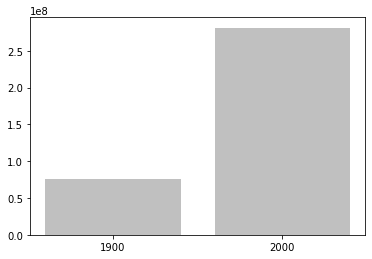

<module 'seaborn' from 'c:\\Users\\nihar\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

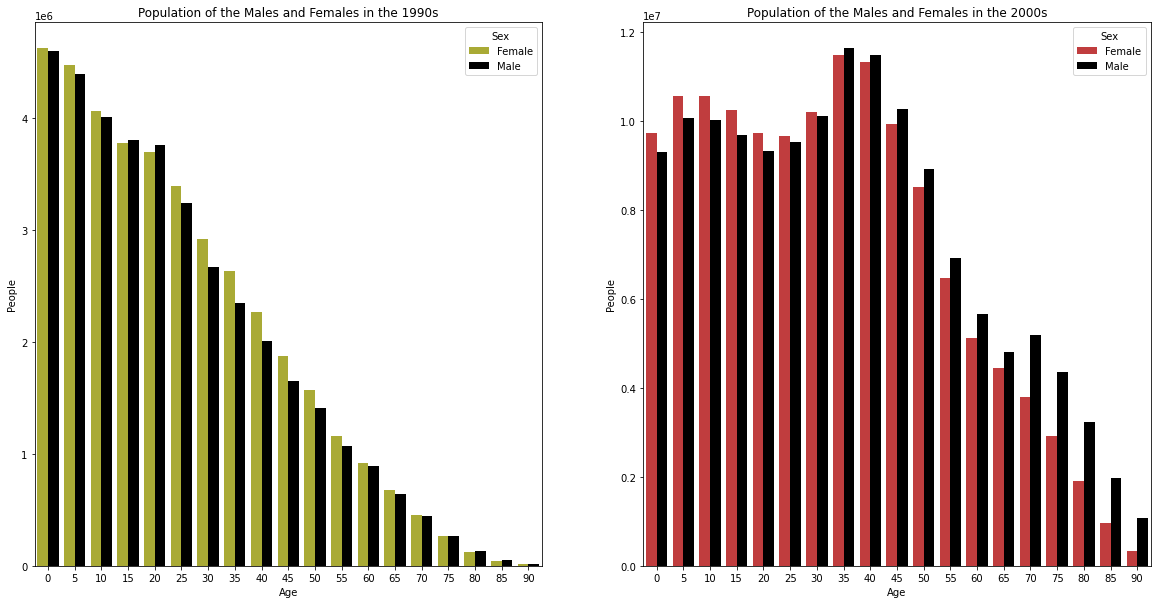

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Population = [pop1900,pop2000]
Year = ['1900','2000']
fig = plt.bar(Year,Population,color = 'silver')
plt.show()
print()

# Comparing the gender with the age and year group

import seaborn as sns
y1900 =df[df['Year'] == 1900] 
y2000=df[df['Year'] == 2000]  

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10)) # setting the axes to plot two graphs side by side
sns.barplot(ax=axes[0],x="Age", y="People", hue="Sex", data=y1900,palette=["C8", "k"])
axes[0].set_title('Population of the Males and Females in the 1990s')
sns.barplot(ax=axes[1],x="Age", y="People", hue="Sex", data=y2000,palette=[ "C3", "k"])
axes[1].set_title('Population of the Males and Females in the 2000s')
sns

In [5]:
 # Your answer here (interpretation of the results):

'''
First I tried to visualize the total number of people in each age_group as it is clear in the donut chart the highest number of population in with the Middle Aged Humans with almost
32 percent of the total population followed by the Children with 24 percentage. The least number of people is with the Teenagers with less than 10 percent.

Then later I tried visualizing the same but by splitting based on the year this time So used a simple bar chart. As it is shown in the year 1990 the least obtained is the Old aged
Group and the most populated is the children while by the 2000s the least populated beacame the Teenage people and the most populated became the Middle Aged people. This means 
we can infer that one- all groups had an increase in the population from the two years which can be both good and a bad thing to happen.
two- Middle Aged people increaced by almost 4 times than that of in 1990s.

After that I tried to just show the difference between the total population of the two years which clearly states that population in 2000s has increased almost thrice than that of
in 1990s.

Later the visualisation of the age campared by the gender for the two years can be seen. This proves that on an average the life span of the Females is more compared to the men.
But it is also true that in the 2000s the women life compared to the men was decreased mostly in the age group of 40 to 90.

'''



'\nFirst I tried to visualize the total number of people in each age_group as it is clear in the donut chart the highest number of population in with the Middle Aged Humans with almost\n32 percent of the total population followed by the Children with 24 percentage. The least number of people is with the Teenagers with less than 10 percent.\n\nThen later I tried visualizing the same but by splitting based on the year this time So used a simple bar chart. As it is shown in the year 1990 the least obtained is the Old aged\nGroup and the most populated is the children while by the 2000s the least populated beacame the Teenage people and the most populated became the Middle Aged people. This means \nwe can infer that one- all groups had an increase in the population from the two years which can be both good and a bad thing to happen.\ntwo- Middle Aged people increaced by almost 4 times than that of in 1990s.\n\nAfter that I tried to just show the difference between the total population of t